In [1]:
from xlcalibur import dataclasses, housekeeping, dataaccess 
from xlcalibur.xcom import Packets
from xlcalibur.systems import Systems
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XLoggingSystem.cpp:377: DEBUG: Reading logging configuration from /grad/ephraimgau/xlcalflightsoftware/install-debug/share/xlcalibur/conf/logging.conf
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XLoggingSystem.cpp:377: DEBUG: Reading logging configuration from logging.conf


In [172]:
#Run_data = [13672]
#for n in Run_data:
#    print (f"\n📁 Processing Run{n:06d}.dat ...")
#    filepath = f"/data/xlcal/datafromxcbe/oldFiles/Run{n:06d}.dat"

In [5]:
infile = dataclasses.XDataFile("/data/xlcal/data/2024_convData-P-ns/Run013685.dat")

/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:65: DEBUG: Reading a file of format version 2


In [6]:
#infile = dataclasses.XDataFile("/data/xlcal/data/2024_convData-P-ns/filepath")

In [7]:
all_alignment = [
    p.Deserialize()
    for p in infile.Scan(Packets.X_PKT_ALIGNMENT_DATA)
]

/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:224: DEBUG: Types selected:  5
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:147: DEBUG: At end of file


In [8]:
# check # of value
print(len(all_alignment))
print(all_alignment[:3])

32
[<xlcalibur.dataclasses.XAlignmentData object at 0x7f92b2754e40>, <xlcalibur.dataclasses.XAlignmentData object at 0x7f92b2755120>, <xlcalibur.dataclasses.XAlignmentData object at 0x7f92b2255200>]


In [9]:
#Remove invalid value 

# keep fit_valid
good_alignment = [
    p for p in all_alignment
    if p.fit_valid
]

# remove inf or Nah
valid_alignment = [
    p for p in good_alignment
    if np.isfinite(p.center_x) and np.isfinite(p.center_y) and p.scale != 0
]

In [10]:
meanx = np.average([a.center_x for a in valid_alignment])
meany = np.average([a.center_y for a in valid_alignment])

In [11]:
t0 = valid_alignment[0].time.to_mjd()
tdata = [86400 * (a.time.to_mjd() - t0) for a in valid_alignment]

In [12]:
xdata = [(a.center_x - meanx) / a.scale for a in valid_alignment]
ydata = [(a.center_y - meany) / a.scale for a in valid_alignment]

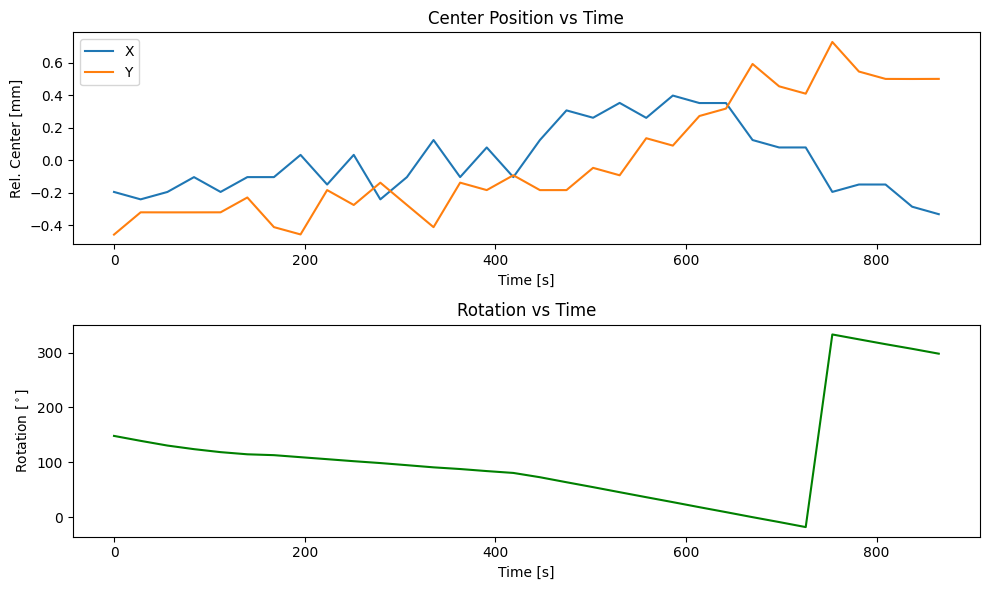

In [14]:

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

ax = axes[0]
ax.plot(tdata, xdata, label="X")
ax.plot(tdata, ydata, label="Y")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rel. Center [mm]")
ax.legend()
ax.set_title("Center Position vs Time")


ax = axes[1]
rotation_data = [a.angle * 180 / np.pi for a in valid_alignment]
ax.plot(tdata, rotation_data, "g")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Rotation [$^\\circ$]")
ax.set_title("Rotation vs Time")


fig.tight_layout()
plt.show()


In [121]:
# check invalid value
print(f"xdata: {xdata[:5]}")
print(f"ydata: {ydata[:5]}")
print(f"tdata: {tdata[:5]}")

xdata: [np.float64(-1.315786233980452), np.float64(-1.2237349657017826), np.float64(-1.088267729633463), np.float64(-0.8588065838554967), np.float64(-0.9493551779487234)]
ydata: [np.float64(0.9234140516317877), np.float64(0.7858992894275245), np.float64(0.6955450272005137), np.float64(0.42073643649433684), np.float64(0.5573328905370564)]
tdata: [0.0, 27.896938053891063, 55.77956065535545, 139.44485380779952, 167.3385713249445]


In [123]:
#ax = axes[0]
#ax.plot(tdata, xdata, label="X")
#ax.plot(tdata, ydata, label="Y")
#ax.legend()
#ax.set_xlabel("Time [s]")
#ax.set_ylabel("Rel. Center [mm]")

Text(4.444444444444445, 0.5, 'Rel. Center [mm]')

In [124]:
#ax = axes[1]
#ax.plot(tdata, [a.angle * 180 / np.pi for a in valid_alignment], "g")
#ax.set_xlabel("Time [s]")
#ax.set_ylabel(r"Rotation [$^\circ$]")

Text(4.444444444444445, 0.5, 'Rotation [$^\\circ$]')

In [13]:
def alignment_run(n):
    filepath = f"/data/xlcal/data/2024_convData-P-ns/Run{n:06d}.dat"
    print (f"\n📁 Processing Run{n:06d}.dat")

    infile = dataclasses.XDataFile(filepath)
    all_alignment = [
    p.Deserialize()
    for p in infile.Scan(Packets.X_PKT_ALIGNMENT_DATA)
    ]
    #Remove invalid value 
    # keep fit_valid
    good_alignment = [
    p for p in all_alignment
    if p.fit_valid
    ]
        
    # remove inf or Nah
    valid_alignment = [
        p for p in good_alignment
        if np.isfinite(p.center_x) and np.isfinite(p.center_y) and p.scale != 0
    ]
    if not valid_alignment:
        print(f"⚠️ No valid alignment data found in Run{n:06d}")
        return
    meanx = np.average([a.center_x for a in valid_alignment])
    meany = np.average([a.center_y for a in valid_alignment])
    t0 = valid_alignment[0].time.to_mjd()
    tdata = [86400 * (a.time.to_mjd() - t0) for a in valid_alignment]
    xdata = [(a.center_x - meanx) / a.scale for a in valid_alignment]
    ydata = [(a.center_y - meany) / a.scale for a in valid_alignment]
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    
    ax = axes[0]
    ax.plot(tdata, xdata, label="X")
    ax.plot(tdata, ydata, label="Y")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Rel. Center [mm]")
    ax.legend()
    ax.set_title("Center Position vs Time")
    
    
    ax = axes[1]
    rotation_data = [a.angle * 180 / np.pi for a in valid_alignment]
    ax.plot(tdata, rotation_data, "g")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Rotation [$^\\circ$]")
    ax.set_title("Rotation vs Time")
    
    
    fig.tight_layout()
    

    #save output
    direction = "Result"
    os.makedirs(direction, exist_ok=True)
    output_path = os.path.join(direction, f"Run{n:06d}.png")
    plt.savefig(output_path)
    plt.close(fig)
    print(f"✅ graph saved {output_path}")

    plt.show()


In [19]:
for n in range(13540,13562):
    alignment_run(n)


📁 Processing Run013540.dat
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:65: DEBUG: Reading a file of format version 2
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:224: DEBUG: Types selected:  5
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:147: DEBUG: At end of file
✅ graph saved Result/Run013540.png

📁 Processing Run013541.dat
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:65: DEBUG: Reading a file of format version 2
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:224: DEBUG: Types selected:  5
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:147: DEBUG: At end of file
✅ graph saved Result/Run013541.png

📁 Processing Run013542.dat
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:65: DEBUG: Reading a file of format version 2
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:224: DEBUG: Type

In [15]:
infile = dataclasses.XDataFile("/data/xlcal/data/2024_convData-P-ns/Run13573.dat")
all_alignment = [
    p.Deserialize()
    for p in infile.Scan(Packets.X_PKT_ALIGNMENT_DATA)
]
#Remove invalid value 

# keep fit_valid
good_alignment = [
    p for p in all_alignment
    if p.fit_valid
]

# remove inf or Nah
valid_alignment = [
    p for p in good_alignment
    if np.isfinite(p.center_x) and np.isfinite(p.center_y) and p.scale != 0
]
mjd_times = np.array(tdata) / 86400 + t0  # convert to MJD

# Initialize empty lists
mjd_case1, mjd_case2, mjd_case3, mjd_case4, mjd_case5 = [], [], [], [], []

# Loop through data points
for i in range(len(xdata)):
    x = xdata[i]
    y = ydata[i]
    t = rotation_data[i]
    mjd = mjd_times[i]
    if abs(x) < 3 and abs(y) < 3:
        mjd_case1.append(mjd)
    elif x > 2 and abs(y) < 3:
        mjd_case2.append(mjd)
    elif x < -2 and abs(y) < 3:
        mjd_case3.append(mjd)
    elif y > 2 and abs(x) < 3:
        mjd_case4.append(mjd)
    elif y < -2 and abs(x) < 3:
        mjd_case5.append(mjd)

/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:65: DEBUG: Reading a file of format version 2
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:224: DEBUG: Types selected:  5
/grad/ephraimgau/xlcalflightsoftware/source/core/src/core/XDataFile.cpp:147: DEBUG: At end of file


In [16]:
print("✅ Case 1: |X|, |Y| < 3mm\n", mjd_case1)
print("✅ Case 2: X > 2mm, |Y| < 3mm\n", mjd_case2)
print("✅ Case 3: X < -2mm, |Y| < 3mm\n", mjd_case3)
print("✅ Case 4: T > 2°, |X|, |Y| < 3mm\n", mjd_case4)
print("✅ Case 5: T < -2°, |X|, |Y| < 3mm\n", mjd_case5)


✅ Case 1: |X|, |Y| < 3mm
 [np.float64(60502.81606578165), np.float64(60502.81638891508), np.float64(60502.81671402179), np.float64(60502.81703698988), np.float64(60502.817359726076), np.float64(60502.81768461581), np.float64(60502.81800775117), np.float64(60502.81833066384), np.float64(60502.81865349924), np.float64(60502.818976646224), np.float64(60502.81929946446), np.float64(60502.8196222756), np.float64(60502.81994553809), np.float64(60502.82026849181), np.float64(60502.82059158059), np.float64(60502.82091444447), np.float64(60502.821237223034), np.float64(60502.8215598888), np.float64(60502.8218826153), np.float64(60502.82220540984), np.float64(60502.822528311954), np.float64(60502.82285100932), np.float64(60502.8231737071), np.float64(60502.82349641766), np.float64(60502.823819118814), np.float64(60502.82414188391), np.float64(60502.824464656296), np.float64(60502.82478769672), np.float64(60502.825110696605), np.float64(60502.82543400126), np.float64(60502.82575701822), np.float6

In [ ]:
save_dir = "MJD_lists"
os.makedirs(save_dir, exist_ok=True)

np.savetxt(os.path.join(save_dir, "mjd_case1_within_3mm.txt"), mjd_case1, fmt="%.8f")
np.savetxt(os.path.join(save_dir, "mjd_case2_x_gt_2mm.txt"), mjd_case2, fmt="%.8f")
np.savetxt(os.path.join(save_dir, "mjd_case3_x_lt_neg2mm.txt"), mjd_case3, fmt="%.8f")
np.savetxt(os.path.join(save_dir, "mjd_case4_t_gt_2deg.txt"), mjd_case4, fmt="%.8f")
np.savetxt(os.path.join(save_dir, "mjd_case5_t_lt_neg2deg.txt"), mjd_case5, fmt="%.8f")

print("📁 All MJD lists saved to:", save_dir)